## INTRODUCCION


El análisis exploratorio de datos (EDA) es una etapa esencial en cualquier investigación cuantitativa, ya que permite describir, resumir y visualizar las características principales de los datos, ofreciendo una comprensión inicial del conjunto de datos analizado. En este caso, el estudio se centra en una base de datos sobre nacidos vivos en el municipio de Bucaramanga, lo que brinda la oportunidad de explorar tendencias sociodemográficas y características asociadas con los recién nacidos y sus familias.

Mediante el uso de técnicas estadísticas y visualizaciones, el EDA facilita la identificación de patrones, anomalías y relaciones entre variables. Este proceso no solo mejora la calidad del análisis posterior, sino que también aporta información clave para la toma de decisiones basada en datos. Según Gupta y Kapoor (2020), el análisis exploratorio permite estructurar datos complejos en formas más comprensibles, lo que es crucial para la formulación de hipótesis y estrategias en diversas disciplinas.

Este trabajo se realizara un AED sobre una base de datos que contiene información de nacidos vivos en el municipio de Bucaramanga durante el periodo 2016 a 2020, obtenida de la plataforma de datos abiertos de Colombia. La base de datos nacidos vivos en el municipio de
Bucaramanga relaciona el registro preliminar de los
nacimientos ocurridos en dicho municipio por:
- Área de nacimiento
- Sexo del bebé
- Peso en gramos y talla del bebé
- Fecha, día y año de nacimiento del bebé
- Tiempo de gestación de la madre y tipo de parto
- Grupo sanguíneo del bebé
- Pertenencia étnica
- Barrio y comuna donde residen los padres
- Número de hijos nacidos vivos
- Número de embarazos de la madre
- Nivel educativo de la madre y el padre
- Último año aprobado de la madre y el padre
- Grupo etario de la madre y el padre
- Curso de vida de la madre y el padre


## Objetivo General

Analizar las características principales de los nacimientos vivos en Bucaramanga durante el periodo 2016 a 2020, evaluando las relaciones entre las variables sociodemográficas y biométricas incluidas en la base de datos.

## Objetivos especificos

Realizar un resumen estadístico de las variables numéricas y categóricas de la base de datos, analizando sus principales características descriptivas.


Implementar una matriz de correlación para las variables numéricas y visualizar las relaciones existentes, identificando las variables que presentan mayores niveles de correlación.

Diseñar un conjunto de visualizaciones estadísticas, utilizando diversos tipos de gráficos (barras, cajas, pie, dispersión, violín, histogramas y mapas), que permitan caracterizar las variables numéricas y categóricas de la base de datos, identificar patrones, tendencias y relaciones significativas, y proporcionar un análisis visual claro y fundamentado de los resultados obtenidos.

## 1. Parámetros y métricas descriptivas

In [2]:
# lectura de los datos

import pandas as pd

datos= pd.read_csv("nacidos_vivos.csv",engine='python',encoding="latin-1",delimiter=";")

In [3]:
# Resumen para variables numéricas
numerical_summary = datos.describe(percentiles=[0.25, 0.5, 0.75]).T
numerical_summary['count'] = datos.count()
numerical_summary = numerical_summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Resumen para variables categóricas
categorical_columns = datos.select_dtypes(include=['object']).columns
categorical_summary = pd.DataFrame({
    'count': datos[categorical_columns].count(),
    'unique': datos[categorical_columns].nunique(),
    'top': datos[categorical_columns].apply(lambda x: x.mode()[0] if not x.mode().empty else None),
    'freq': datos[categorical_columns].apply(lambda x: x.value_counts().iloc[0] if not x.value_counts().empty else None)
})


#Resultados
print("Tabla 1. Resumen para variables numéricas:")
print(numerical_summary)

print("\n Tabla 2.Resumen para variables categóricas:")
print(categorical_summary)

Tabla 1. Resumen para variables numéricas:
                            count         mean         std     min     25%  \
PESO                        31433  3163.903541  508.398610   290.0  2900.0   
TALLA                       31434    50.198670    2.996665    23.0    49.0   
DIA                         31434    15.609467    8.752066     1.0     8.0   
AÑO                         31434  2017.897627    1.367233  2016.0  2017.0   
GESTACION                   31430    38.227235    1.864863    19.0    38.0   
NUMERO HIJOS NACIDOS VIVOS  31434     1.802093    0.995869     1.0     1.0   
NUMERO EMBARAZOS            31434     1.985430    1.172291     1.0     1.0   
EDAD PADRE                  31296    29.688746    7.373749    13.0    24.0   
EDAD MADRE                  31296    29.632126    7.362943    13.0    24.0   

                               50%     75%     max  
PESO                        3200.0  3490.0  5380.0  
TALLA                         50.0    52.0    64.0  
DIA              

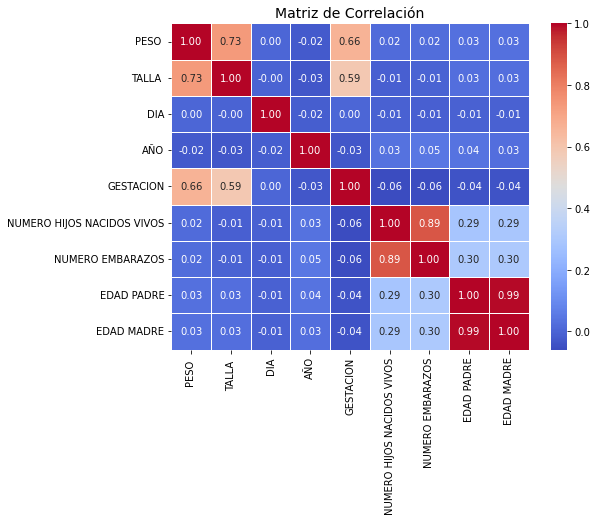

In [12]:
# Calcular la matriz de correlación para las variables numéricas

import seaborn as sns
import matplotlib.pyplot as plt

matriz_correlacion = datos.corr()
matriz_correlacion


# Crear el heatmap con anotaciones y colores
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)

plt.title("Matriz de Correlación", fontsize=14)
plt.show()

**Analisis de los resultados obtenidos**


La Tabla 1 presenta estadísticas  sobre las variables de estudio relacionadas con el peso, la talla, la gestación, la edad de los padres y el número de hijos nacidos vivos en el departamento de Bucaramanga entre 2016 y 2020.El peso promedio de los bebés recién nacidos en este período fue de 3164.52 gramos. Además, se observó que el peso máximo registrado fue de 5380 gramos, mientras que el peso mínimo fue de 290 gramos. En cuanto a la talla, la media fue de 50.2023 cm, con una talla máxima de 64 cm y mínima de 23 cm.Respecto a la gestación, el promedio de semanas de embarazo fue de 38.223, lo que equivale aproximadamente a 8 meses y 20 días. La gestación más corta registrada fue de 19 semanas, lo que sugiere la posibilidad de que la madre haya perdido al bebé, dado que esta duración es inferior a los 4 meses. En contraste, la gestación más larga fue de 42 semanas, es decir, aproximadamente 9 meses y unos días.En lo que respecta a la edad de los padres, tanto el promedio de edad de las madres como de los padres fue de aproximadamente 30 años. Sin embargo, se encontraron edades extremas, con un máximo de 99 años y un mínimo de 13 años tanto para las madres como para los padres.

Finalmente, el número máximo de hijos nacidos vivos por una madre en este municipio fue de 20, mientras que el mínimo fue de 1. Cabe destacar que las varianzas de las variables analizadas presentan diferencias notables, lo que indica la existencia de multicolinealidad entre ellas.

Por otro lado la Tabla 2 muestra que la mayoría de los nacimientos en Bucaramanga entre 2016 y 2020 ocurrieron en la cabecera municipal, con una ligera mayoría de nacimientos masculinos. El parto espontáneo fue el más común y el factor RH positivo predominó. La mayoría de los nacimientos ocurrieron en septiembre y el viernes. En cuanto a los padres, la mayoría tiene un nivel educativo medio y se encuentra en el grupo de 29 a 59 años. Además, el régimen contributivo de seguridad social fue el más frecuente.


## Escalamiento, estandarización y codificación

Categorizar una variable continua: Elegiremos una variable como "EDAD MADRE" y la categorizaremos en intervalos relevantes, la eleccion de esta  variable se debe al impacto significativo en muchos contextos relacionados con la salud y el desarrollo, como los riesgos asociados al embarazo y el parto, así como las condiciones socioeconómicas.

Propondremos categorías justificadas, como:

Adolescente: Menor de 20 años.

Joven adulta: Entre 20 y 34 años.

Adulta mayor: Más de 34 años.

In [4]:
datos['CATEGORIA_EDAD_MADRE'] = pd.cut(
    datos['EDAD MADRE'],
    bins=[0, 20, 35, float('inf')],  # Límites de las categorías
    labels=['Adolescente', 'Joven adulta', 'Adulta mayor'],  # Nombres de las categorías
    right=False  
)



**Estandarización**: 

Seleccionaremos dos variables numéricas que difieran en magnitud o unidades. 

    PESO (gramos) y TALLA (cm).

Escalaremos estas variables usando la estandarización (Z-score) o normalización (min-max) para compararlas.
Esto nos permitirá analizar si hay similitudes o diferencias en la distribución de estas variables.

In [7]:
from sklearn.preprocessing import StandardScaler

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización a las columnas "PESO" y "TALLA"
datos["PESO_ESTANDARIZADO"] = scaler.fit_transform(datos[['PESO ']])
datos["TALLA_ESTANDARIZADA"] = scaler.fit_transform(datos[['TALLA ']])

# Verificar los resultados
print(datos[['PESO ', "PESO_ESTANDARIZADO", 'TALLA ', "TALLA_ESTANDARIZADA"]].head())

    PESO   PESO_ESTANDARIZADO  TALLA   TALLA_ESTANDARIZADA
0  3720.0            1.093837      54             1.268540
1  3050.0           -0.224047      49            -0.400008
2  3660.0            0.975818      49            -0.400008
3  2420.0           -1.463252      49            -0.400008
4  2260.0           -1.777971      46            -1.401137


El análisis muestra los valores estandarizados de las variables PESO y TALLA, que ahora tienen una media de 0 y una desviación estándar de 1. Los resultados permiten comparar directamente estas variables, eliminando las diferencias de escala. Por ejemplo, un valor de PESO_ESTANDARIZADO de 1.093837 indica que ese peso está aproximadamente 1.09 desviaciones estándar por encima del promedio, mientras que un valor de TALLA_ESTANDARIZADA de 1.268540 señala una talla también por encima del promedio en una proporción similar. En contraste, valores negativos como -1.777971 reflejan individuos cuyo peso está significativamente por debajo del promedio

## Graficos y vizualizaciones

In [5]:
# Paquetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

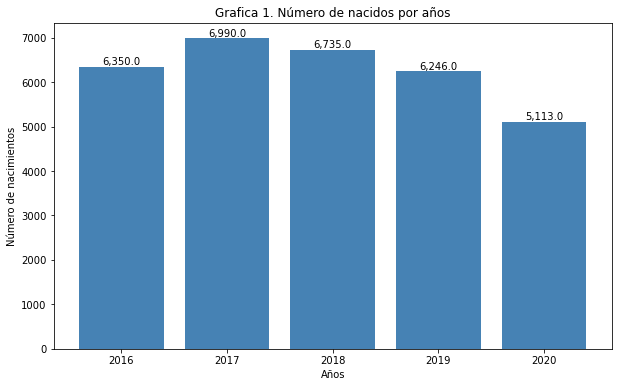

In [10]:
# Grafico de barras


datos_año = datos["AÑO"].value_counts().reset_index()
datos_año.columns = ["AÑO", "n"]

datos_año["prop"] = datos_año["n"] / datos_año["n"].sum()


plt.figure(figsize=(10, 6))
plt.bar(datos_año["AÑO"], datos_año["n"], color="steelblue")

for i, row in datos_año.iterrows():
plt.text(row["AÑO"], row["n"] / 2, f"{row['prop']:.1%}", ha="center", va="center", color="white", fontsize=10)

# Etiquetas
plt.xlabel("Años")
plt.ylabel("Número de nacimientos")
plt.title("Grafica 1. Número de nacidos por años")
plt.show()

La grafica 1 muestra el numero de nacimientos por años, de acuerdo a esta se puede evidenciar que el año 2017 fue el año con más número de nacidos vivos en el municipio de Bucaramanga con un total de 6990 nacidos, además del año 2016 al 2017 hubo un incremento de 640 nacimientos y del año 2017 al 2020 se ve un descenso progresivo de la cifra del número de nacidos, siendo el 2020 el año con menor número de nacimiento con un total de 5.113

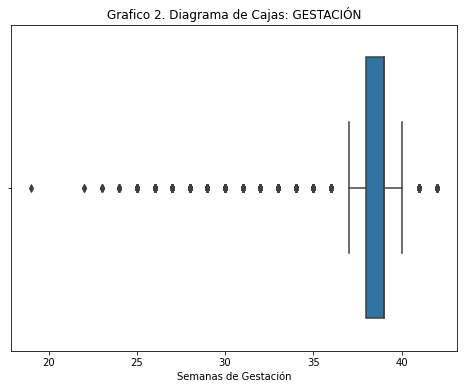

In [12]:
# grafico de cajas 

plt.figure(figsize=(8, 6))
sns.boxplot(data=datos, x='GESTACION')  
plt.title('Grafico 2. Diagrama de Cajas: GESTACIÓN')
plt.xlabel('Semanas de Gestación')
plt.show()

De acuerdo con el grafico 2, se puede observar que la mayoria de los nacidos vivos tuvieron una gestacion mayor a 35 semanas, sin embargo se puedes observar algunos valores menores a 20 semanas de gestacion, lo que posiblemente indica valores atipicos o madres que que tuvieron un parto adelantado

Text(0, 0.5, '')

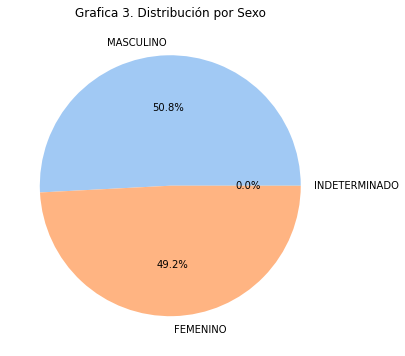

In [13]:
# Diagrama de pastel

plt.figure(figsize=(8, 6))
datos['SEXO'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    figsize=(8, 6), 
    colors=sns.color_palette('pastel'),  # Colores automáticos
    labels=datos['SEXO'].value_counts().index  # Etiquetas dinámicas
)
plt.title('Grafica 3. Distribución por Sexo')
plt.ylabel('') 

Del gráfico 3, se puede inferir que la mayoría de los nacidos vivos en el municipio de Bucaramanga fueron de género masculino, representando un 50.8% del total, mientras que el 49.2% correspondió al género femenino. Esto refleja una diferencia relativamente pequeña de 1.6 puntos porcentuales, lo cual indica una distribución de nacimientos casi equilibrada entre ambos géneros.

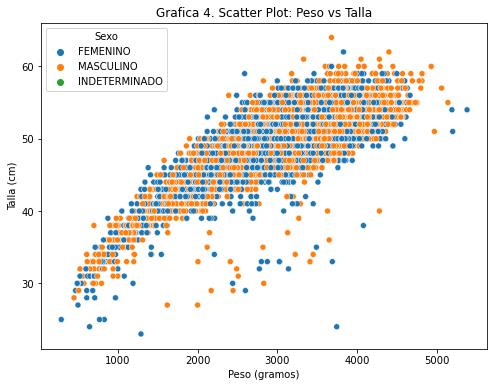

In [14]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=datos, x='PESO ', y='TALLA ', hue='SEXO')  
plt.title('Grafica 4. Scatter Plot: Peso vs Talla')
plt.xlabel('Peso (gramos)')
plt.ylabel('Talla (cm)')
plt.legend(title='Sexo')
plt.show()

El scatter plot que relaciona el peso y la talla según el sexo muestra una tendencia creciente, indicando que a medida que aumenta la talla, también lo hace el peso. Esto es consistente para ambos géneros. Además, los puntos de datos correspondientes a los géneros masculino y femenino están distribuidos de manera similar, lo que sugiere que no hay diferencias significativas en la relación entre peso y talla entre los géneros. Esto podría implicar que, independientemente del sexo, la relación peso-talla sigue un patrón general comparable.

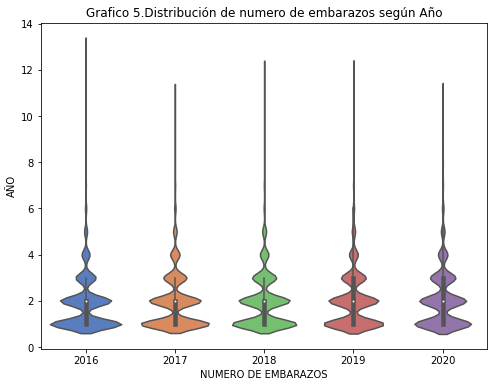

In [29]:
# grafico de violin
plt.figure(figsize=(8, 6))
sns.violinplot(data=datos, x='AÑO', y='NUMERO EMBARAZOS', palette='muted')  
plt.title('Grafico 5.Distribución de numero de embarazos según Año')
plt.xlabel('NUMERO DE EMBARAZOS')
plt.ylabel('AÑO')
plt.show()


En el gráfico de violín sobre la distribución del número de embarazos por año, se observa que los dos últimos años del período analizado presentan una mayor concentración de embarazos en comparación con los años anteriores. Esto se refleja en la forma más alargada y densa del gráfico en estos años, indicando una mayor frecuencia de mujeres con múltiples embarazos durante este periodo

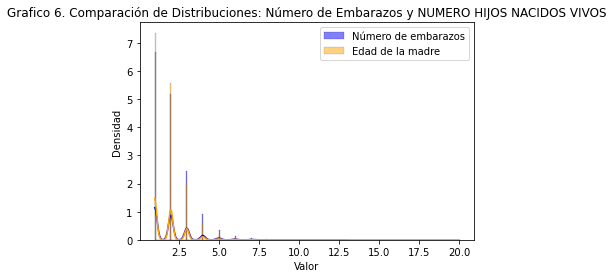

In [34]:
# Histogramas comparados

# Histograma del número de embarazos
sns.histplot(datos['NUMERO EMBARAZOS'], kde=True, color='blue', label='Número de embarazos', stat='density')

# Histograma de numero hijos nacidos 
sns.histplot(datos['NUMERO HIJOS NACIDOS VIVOS'], kde=True, color='orange', label='Edad de la madre', stat='density')

# Títulos y etiquetas
plt.title('Grafico 6. Comparación de Distribuciones: Número de Embarazos y NUMERO HIJOS NACIDOS VIVOS')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()


Al comparar las distribuciones del número de embarazos y del número de hijos nacidos vivos, encontramos que ambas siguen una distribución similar, lo cual es de esperarse en muchos contextos relacionados con la salud reproductiva. Este patrón puede explicarse por la naturaleza del proceso biológico involucrado: cada embarazo tiene una probabilidad de resultar en uno o más hijos nacidos vivos.

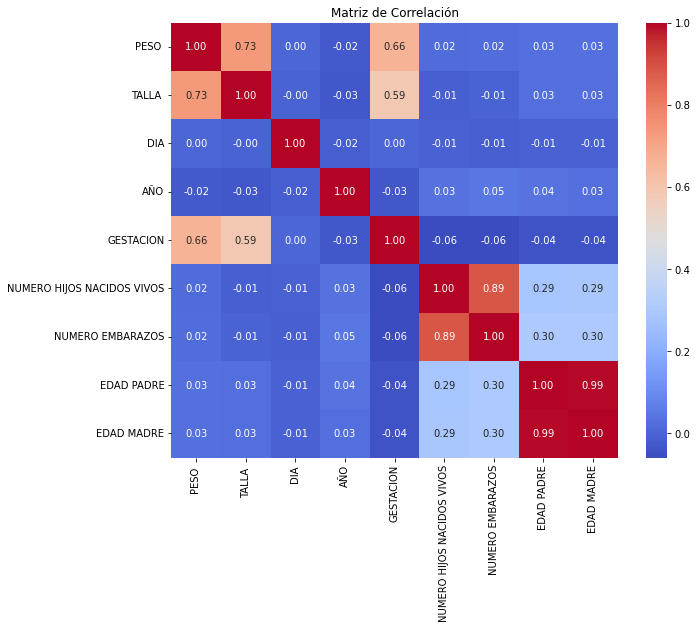

In [16]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = datos.corr()  # Matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


La visualización de la matriz de correlación mediante gráficos de mapas  muestra que, aunque la mayoría de las correlaciones son débiles, destacan algunas asociaciones significativas. Existe una relación casi perfecta y positiva entre la edad del padre y la edad de la madre, así como una fuerte correlación positiva entre el número de embarazos y el número de hijos nacidos vivos (0.89),lo cual tiene mucho sentido, ya que a medida que aumenten el número de embarazos, aumentara el número de hijos nacidos vivo. También se observa una correlación moderada entre gestación y peso (0.66), así como entre gestación y talla, lo cual era de esperarse puesto que a medida que el bebe dura mas tiempo en gestion mayor peso y talla va a tener. Por otro lado, el peso y la talla presentan una asociación más fuerte, evidenciada por el grosor y la intensidad del color. Relaciones más débiles pero positivas se encuentran entre la edad del padre y el número de hijos nacidos vivos, y entre el número de embarazos y las edades de los padres.

**CONCLUSIONES**

A lo largo del análisis realizado sobre la base de datos del número de hijos nacidos en el municipio de Bucaramanga entre 2016 y 2020, se llevaron a cabo varias etapas clave que me permitieron comprender mejor los patrones y tendencias de los nacimientos. Comencé con un análisis descriptivo, el cual proporcionó una visión general de las variables principales, como la media, mediana y desviación estándar, ayudándome a identificar la distribución de los nacimientos a lo largo de los años.

Las visualizaciones creadas, como gráficos de barras, de violin entre otras, fueron cruciales para observar las tendencias a lo largo del tiempo, destacando posibles aumentos o disminuciones en el número de nacimientos en ciertos períodos. A través de estas visualizaciones, pude identificar patrones estacionales y  anomalías. Este proceso me permitió desarrollar una comprensión más profunda de cómo varió el número de hijos nacidos en Bucaramanga durante esos años, lo cual es fundamental para realizar intervenciones o estudios más específicos en el área de salud pública. Aprendí que el uso combinado de análisis descriptivos, estandarización y visualización no solo facilita la interpretación de los datos, sino que también mejora la capacidad de detectar tendencias y tomar decisiones basadas en evidencias.

## Referencias

https://www.datos.gov.co/Salud-y-Protecci-n-Social/43-Nacidos-Vivos-en-Municipio-de-Bucaramanga-enero/x5xp-9w4b/about_data

Gupta, S., & Kapoor, A. (2020). Data Visualization and Exploratory Data Analysis in Statistics. Springer.

Samir Madhavan. (2015). Mastering Python for Data Science: Explore the
World of Data Science Through Python and Learn How to Make Sense of
Data. Packt Publishing. (pp. 77-106).

Thakur, A. (2016). Python: Real-World Data Science. Packt Publishing.
(pp. 536 - 563

https://www.udemy.com/course/visualizacion-de-datos-en-python-matplotlib/?utm_source=bing&utm_medium=udemyads&utm_campaign=BG-Search_DSA_Beta_Prof_la.ES_cc.ROW-Spanish&campaigntype=Search&portfolio=Bing-ROW-Spanish&language=ES&product=Course&test=&audience=DSA&topic=&priority=Beta&utm_content=deal4584&utm_term=_._ag_1313918783731057_._ad__._kw_Dev%20es_._de_c_._dm__._pl__._ti_dat-2333919589018169:loc-43_._li_148375_._pd__._&matchtype=b&msclkid=0929e5f16cbd1e9cbe48829fb7508ba9



